<a href="https://colab.research.google.com/github/meghannulf/SWOP-4/blob/master/predict_highest_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = '/content/full_query.csv'
#print(file_path)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Mounted at /content/drive


In [2]:
# Assuming your dataset is in a CSV file named 'movies_dataset.csv'
df = pd.read_csv('full_query.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,Unnamed: 0,movie,title,genreName,grossNum,adjustedGross,grossUnit,duration,pubDate,pubMonth,pubYear
0,0,http://www.wikidata.org/entity/Q300356,A Chinese Ghost Story,fantasy,3783972.0,1.023039e+07,http://www.wikidata.org/entity/Q4917,92.0,1987-07-18T00:00:00Z,7,1987
1,1,http://www.wikidata.org/entity/Q39070473,A Quiet Place,илмӣ-тахаюллӣ; Horror; горор; sci-fi,340939361.0,4.186742e+08,http://www.wikidata.org/entity/Q4917,90.0,2018-04-05T00:00:00Z,4,2018
2,2,http://www.wikidata.org/entity/Q39070473,A Quiet Place,Horror; горор; sci-fi; илмӣ-тахаюллӣ,340952971.0,4.186909e+08,http://www.wikidata.org/entity/Q4917,90.0,2018-04-05T00:00:00Z,4,2018
3,3,http://www.wikidata.org/entity/Q56277622,A Shaun the Sheep Movie: Farmageddon,sci-fi; илмӣ-тахаюллӣ,16489589.0,1.985290e+07,http://www.wikidata.org/entity/Q4917,87.0,2019-04-05T00:00:00Z,4,2019
4,4,http://www.wikidata.org/entity/Q255260,A Tale of Two Sisters,горор; Horror,1062878.0,1.780167e+06,http://www.wikidata.org/entity/Q4917,110.0,2003-06-13T00:00:00Z,6,2003


#Processing for prediction

In [3]:
columns_to_drop = ['Unnamed: 0', 'movie', 'genreName', 'grossUnit', 'grossNum', 'duration', 'pubDate', 'grossNum', 'pubYear']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [4]:
df.head()

,title,adjustedGross,pubMonth
0,A Chinese Ghost Story,1.023039e+07,7
1,A Quiet Place,4.186742e+08,4
2,A Quiet Place,4.186909e+08,4
3,A Shaun the Sheep Movie: Farmageddon,1.985290e+07,4
4,A Tale of Two Sisters,1.780167e+06,6


In [5]:
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
           7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
df['season'] = df['pubMonth'].map(seasons)

season_mapping = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
df['season_numbers'] = df['season'].map(season_mapping)

In [6]:
df.drop(['pubMonth'], axis=1)


,title,adjustedGross,season,season_numbers
0,A Chinese Ghost Story,1.023039e+07,Summer,2
1,A Quiet Place,4.186742e+08,Spring,1
2,A Quiet Place,4.186909e+08,Spring,1
3,A Shaun the Sheep Movie: Farmageddon,1.985290e+07,Spring,1
4,A Tale of Two Sisters,1.780167e+06,Summer,2
...,...,...,...,...
728,Zombi 2,1.250695e+10,Summer,2
729,Zombieland,1.458685e+08,Fall,3
730,Zombieland: Double Tap,1.041411e+08,Fall,3
731,xXx,4.723184e+08,Summer,2


In [7]:
#Putting movie names into array
vectorizer = TfidfVectorizer()
movie_name_features = vectorizer.fit_transform(df['title']).toarray()

In [8]:
print(df['pubMonth'].dtype)

int64


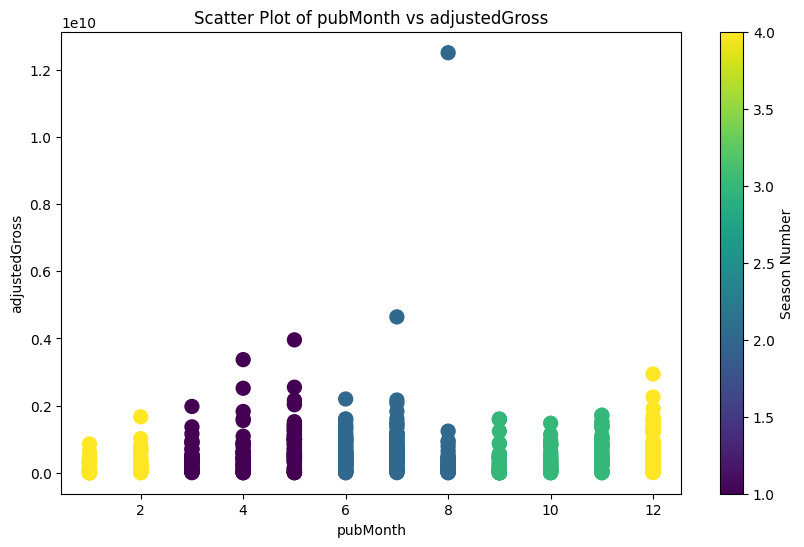

In [9]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['pubMonth'], df['adjustedGross'], c=df['season_numbers'], cmap='viridis', s=100)
plt.title('Scatter Plot of pubMonth vs adjustedGross')
plt.xlabel('pubMonth')
plt.ylabel('adjustedGross')
plt.colorbar(label='Season Number')
plt.show()

In [10]:
df.head()

,title,adjustedGross,pubMonth,season,season_numbers
0,A Chinese Ghost Story,1.023039e+07,7,Summer,2
1,A Quiet Place,4.186742e+08,4,Spring,1
2,A Quiet Place,4.186909e+08,4,Spring,1
3,A Shaun the Sheep Movie: Farmageddon,1.985290e+07,4,Spring,1
4,A Tale of Two Sisters,1.780167e+06,6,Summer,2


In [11]:
print(movie_name_features)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.57334212]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [12]:
numeric_features = df[['pubMonth', 'adjustedGross']].values

#Visualization of Numeric Features

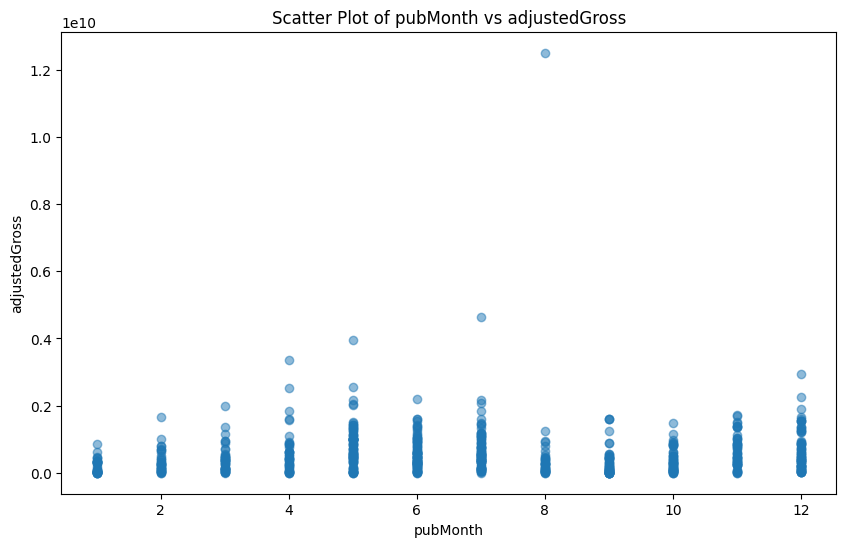

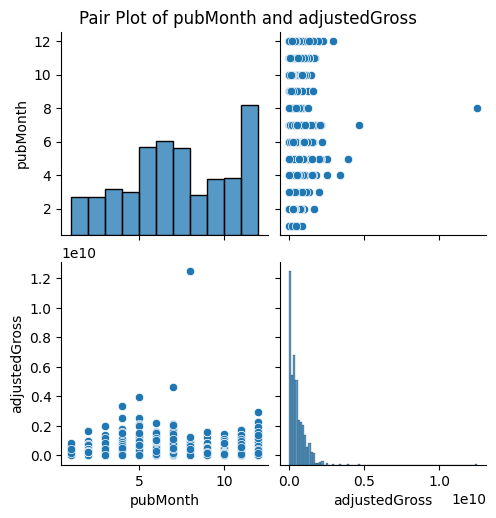

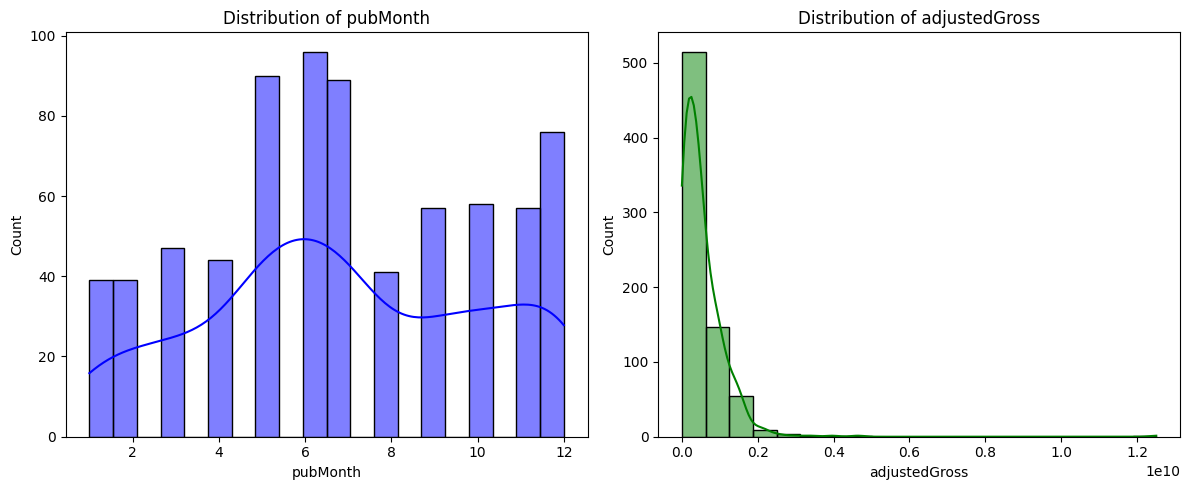

In [13]:
numeric_features = df[['pubMonth', 'adjustedGross']].values

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(numeric_features[:, 0], numeric_features[:, 1], alpha=0.5)
plt.title('Scatter Plot of pubMonth vs adjustedGross')
plt.xlabel('pubMonth')
plt.ylabel('adjustedGross')
plt.show()

#pair plot again to show the pubmonth vs adjusted gross after data manipulation
sns.pairplot(df[['pubMonth', 'adjustedGross']])
plt.suptitle('Pair Plot of pubMonth and adjustedGross', y=1.02)
plt.show()

#distribution plot for each feature
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['pubMonth'], bins=20, kde=True, color='blue')
plt.title('Distribution of pubMonth')

plt.subplot(1, 2, 2)
sns.histplot(df['adjustedGross'], bins=20, kde=True, color='green')
plt.title('Distribution of adjustedGross')

plt.tight_layout()
plt.show()


The scatter plot shows a clear relationship between pubMonth and adjustedGross.  The pair plot sees relationship between different pairs of features.  Finally, the distribution plotsshow the shape and range and tendency of features

#Using model to split into training and testing

In [14]:
#combine numeric and text features
X_combined = np.concatenate((numeric_features, movie_name_features), axis=1)
y = df['season_numbers'].values

#Splitting into training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['season_numbers'].values, test_size=0.2, random_state=42)

#Train model

In [16]:

#classification algorithm
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

#class probabilities for each sample
class_probabilities = clf.predict_proba(X_test)

#choose the class with highest probability
predicted_class = np.argmax(class_probabilities, axis=1)

#mapping the predicted class back to the actual season_number
predicted_season_numbers = predicted_class + 1

#df with actual and predicted numbers
results_df = pd.DataFrame({'Actual_Season': y_test,
                            'Predicted_Season': predicted_season_numbers})

#getting highest grossing season
results_df['Actual_Highest_Grossing_Season'] = results_df['Actual_Season'].map(season_mapping)
results_df['Predicted_Highest_Grossing_Season'] = results_df['Predicted_Season'].map(season_mapping)

#finding the overall highest-grossing season for both actual and predicted
overall_actual_highest_grossing_season = results_df['Actual_Season'].mode()[0]
overall_predicted_highest_grossing_season = results_df['Predicted_Season'].mode()[0]

#accuracy and precision metrics
accuracy = accuracy_score(results_df['Actual_Season'], results_df['Predicted_Season'])
precision = precision_score(results_df['Actual_Season'], results_df['Predicted_Season'], average='weighted')

print(f"Overall Actual Highest Grossing Season: {overall_actual_highest_grossing_season}")
print(f"Overall Predicted Highest Grossing Season: {overall_predicted_highest_grossing_season}")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")

Overall Actual Highest Grossing Season: 3
Overall Predicted Highest Grossing Season: 3
Accuracy: 0.99
Precision: 0.99


**Since season 3 is equal to Fall, Fall is the highest grossing season and predicted season for releasing movies to make the most money**

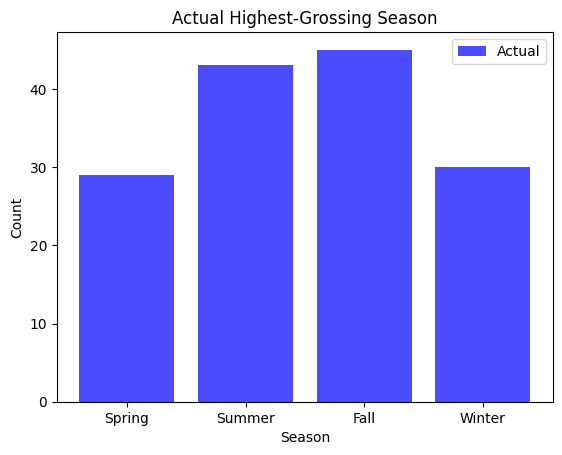

In [17]:
import matplotlib.pyplot as plt

season_names = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

#bar chart for actual highest-grossing season
actual_counts = results_df['Actual_Season'].value_counts().sort_index()
plt.bar(actual_counts.index, actual_counts, color='blue', alpha=0.7, label='Actual')

#label x-axis
plt.xticks(actual_counts.index, [season_names[num] for num in actual_counts.index])

#labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Actual Highest-Grossing Season')
plt.legend()


plt.show()


#Visualization of highest grossing season

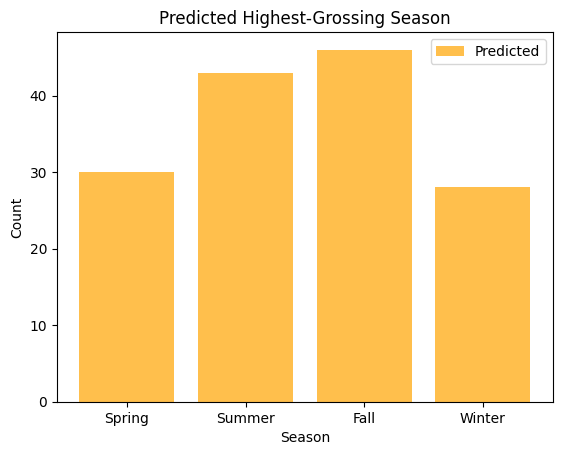

In [18]:
# Create a bar chart for predicted highest-grossing season
predicted_counts = results_df['Predicted_Season'].value_counts().sort_index()
plt.bar(predicted_counts.index, predicted_counts, color='orange', alpha=0.7, label='Predicted')

# Label the x-axis ticks with season names
plt.xticks(predicted_counts.index, [season_names.get(num, num) for num in predicted_counts.index])

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Predicted Highest-Grossing Season')
plt.legend()

# Show the plot
plt.show()